In [2]:
from acip.acip import ACIP
from utils.utils_experiment import read_config, load_data
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = 'spleen'
X, Y, gene_ids = load_data(dataset)
w = ACIP(X, config=dataset, verbose=False, col_ids=gene_ids)
w.flow()


****************************** Filtering genes *********************************
Keeping 1861 genes.

************************** Reducing dimensionality *****************************

******************* Getting explained variance using PCA. **********************
Ankle found at 12 components.
Used 12 components.

********************************* Clustering ***********************************
Trying n_clusters=10: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

Clustering complete.
Highest score is achieved for n_clusters = 3

****************************** Finding Markers *********************************
Completed clusters:: 100%|██████████| 3/3 [00:10<00:00,  3.64s/it]



********************** Constructing visual embeddings. *************************


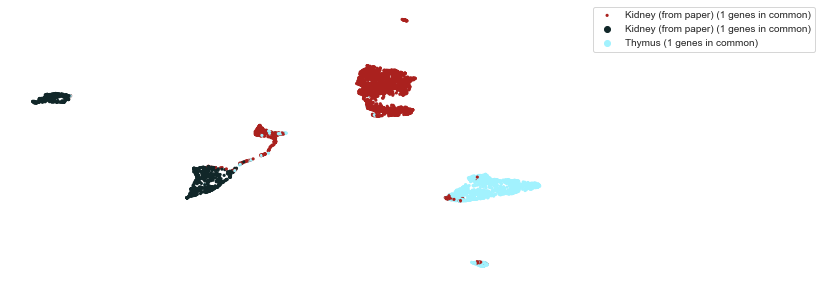

In [4]:
w.plot('2d')